In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import stablab

In [2]:
from Nagumo import Avec, A_pm, co_contour_adaptive

In [4]:
p = stablab.Struct()
s = stablab.Struct()

# parameters
p.a = 0.1
p.b = -1

# study controls
s.I = 30
N = 2**7

# Initialize STABLAB structures
s.L = -s.I
s.R = s.I
a = s.R
b = 0
evan_mat = Avec # Avec is the matrix A where W' = AW (Evans ODE matrix)
s.n = 4

In [5]:
# sets STABLAB structures to their default settings
s,e,m,c = stablab.emcset(s,'front',
    stablab.evans.LdimRdim(evan_mat,s,p),'reg_reg_polar',evan_mat)

In [6]:
e.A_pm = A_pm
c.first_step = 0.05 # first step in h to try
c.max_step = 0.05 # maximum step in h allowed
c.min_step_size = 1e-6 # minimum step size in h allowed
e.abs_tol = 1e-4 # abs tolerance desired in solution
c.tol = 0.1
c.max_pts = 5000 # maximum number of points on contour allowed
c.Lproj = lambda matrix,posneg,eps: stablab.projection5(matrix,posneg,eps,e)
c.Rproj = lambda matrix,posneg,eps: stablab.projection5(matrix,posneg,eps,e)

In [7]:
fun = lambda h: 3+np.exp(1j*2*np.pi*h)
c.hit_points = np.array([])

In [8]:
m.stats = 'off'
c.stats = 'on'
m.eig_tol = 0.01
m.num_polys = 1
m.degree = 60
e.evans = 'reg_reg_bvp_cheb'

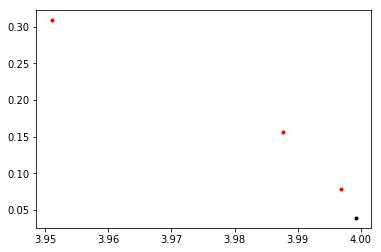

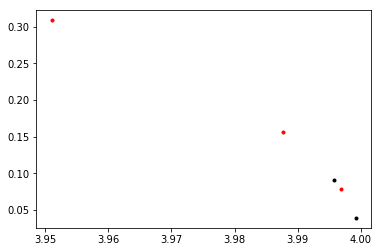

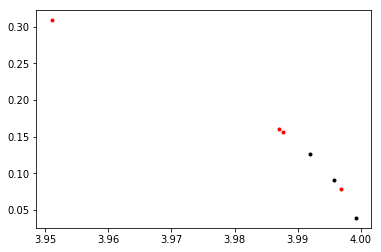

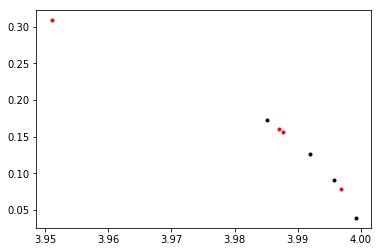

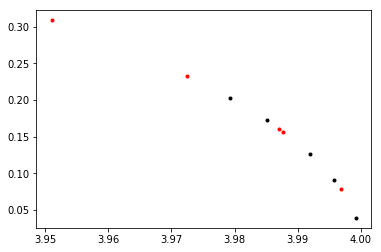

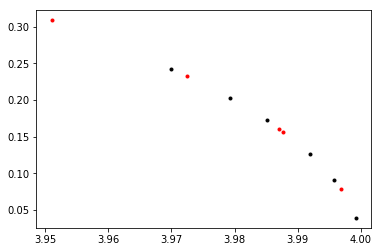

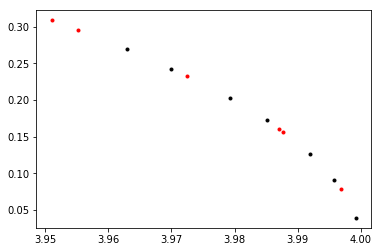

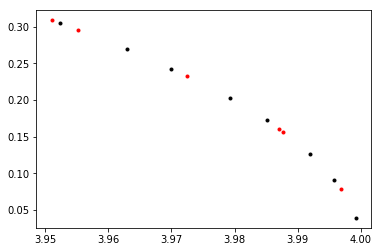

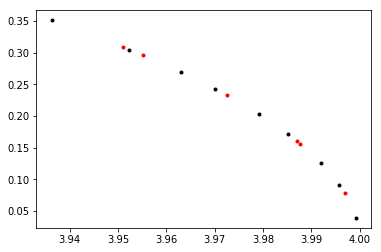

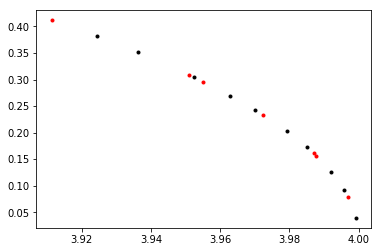

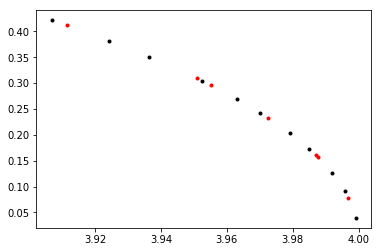

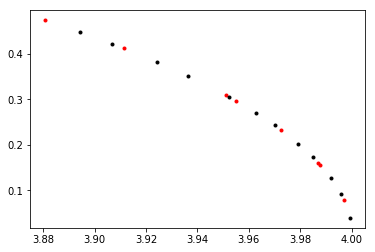

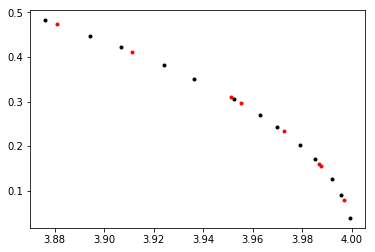

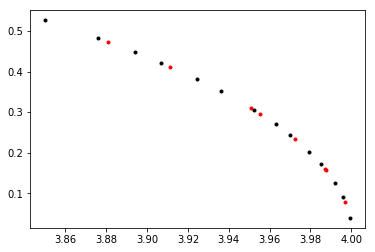

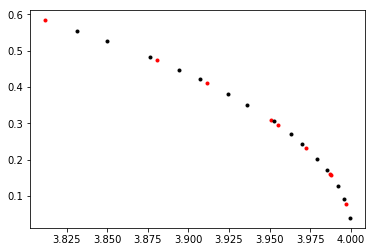

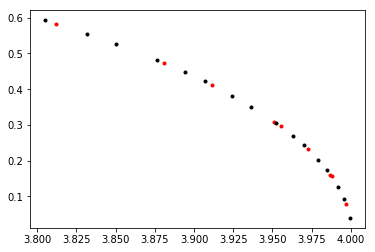

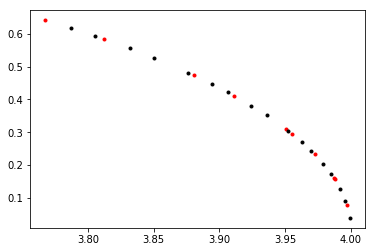

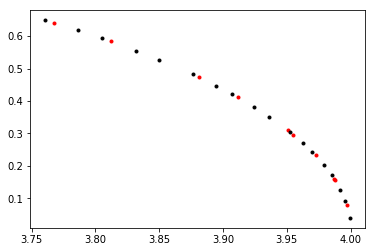

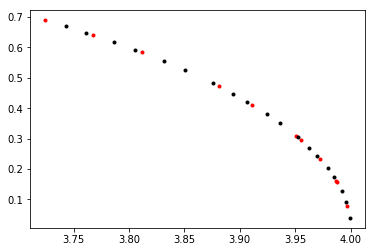

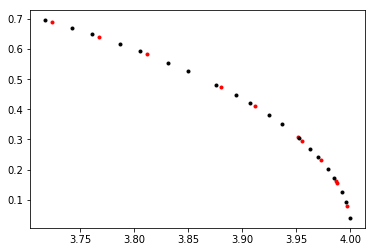

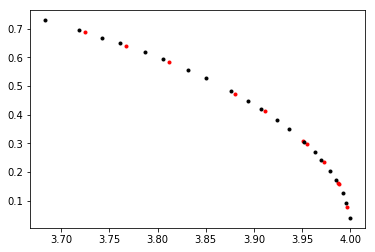

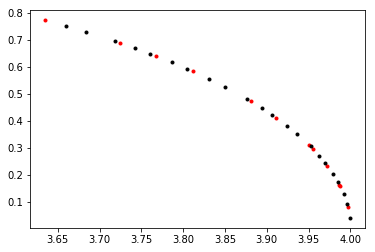

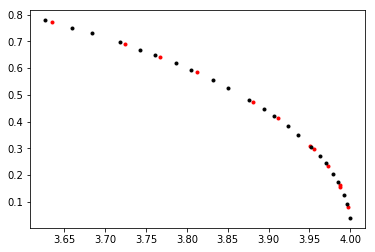

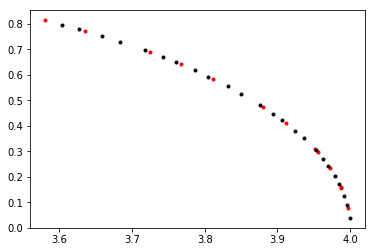

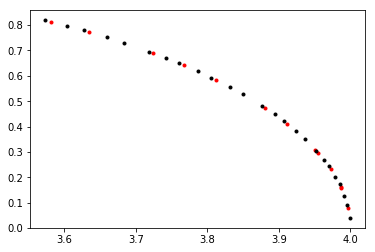

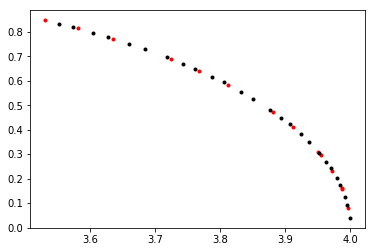

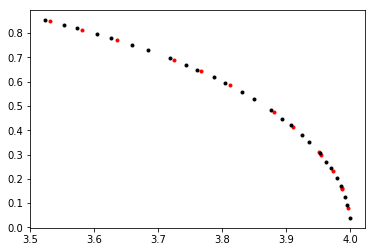

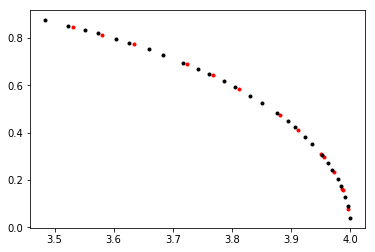

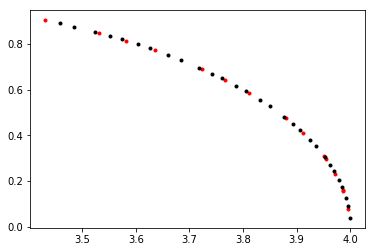

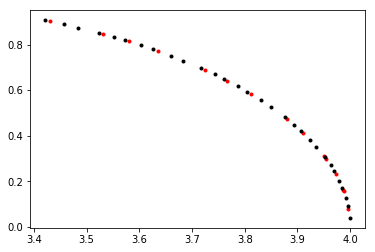

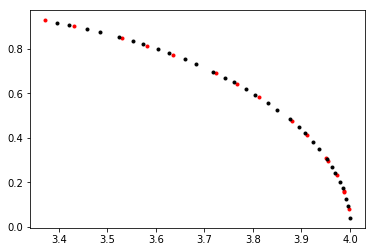

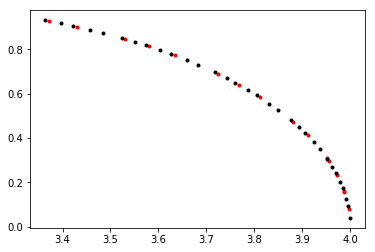

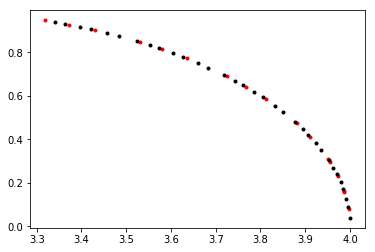

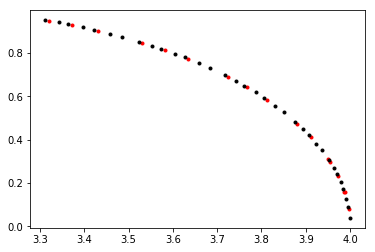

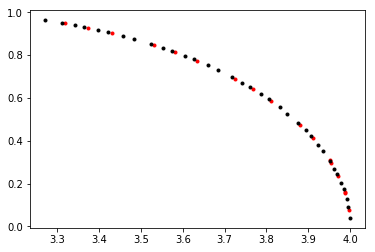

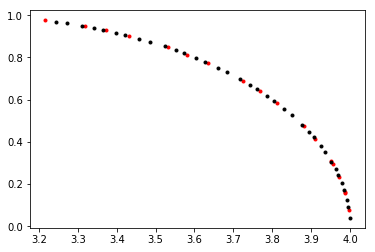

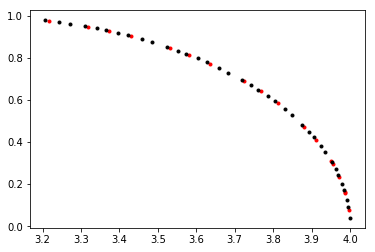

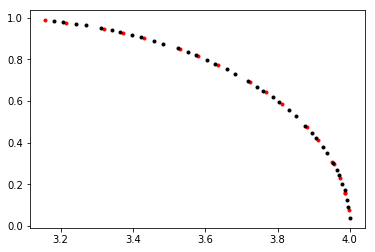

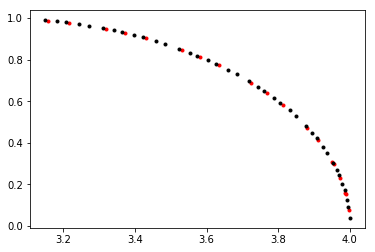

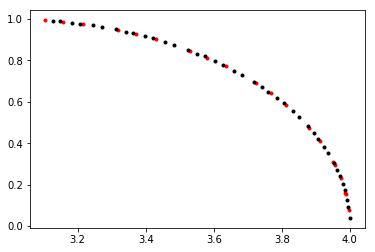

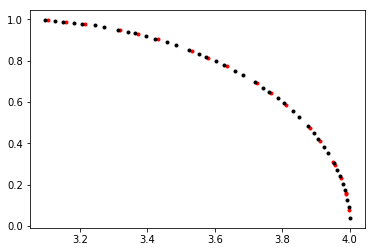

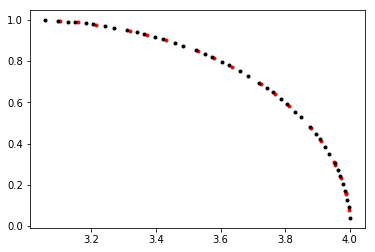

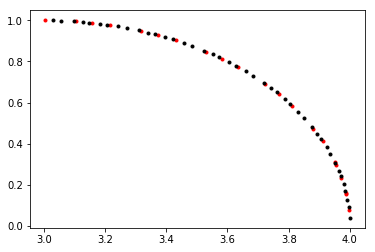

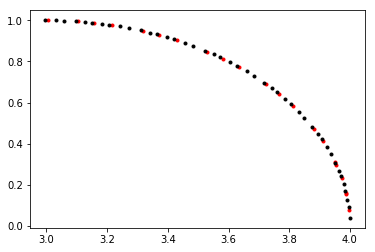

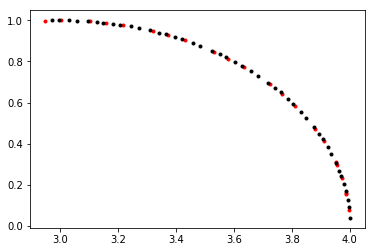

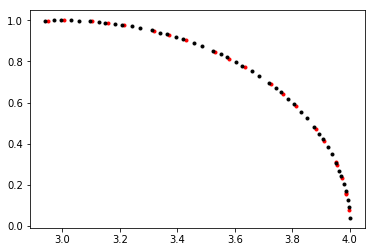

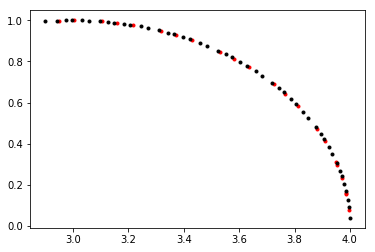

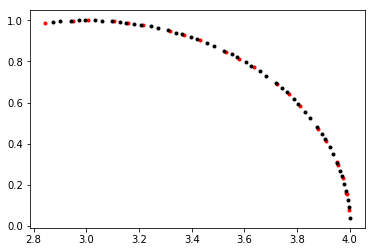

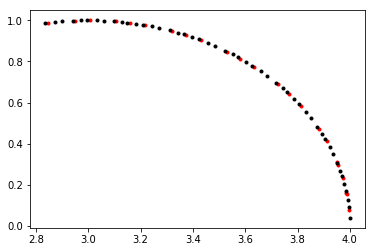

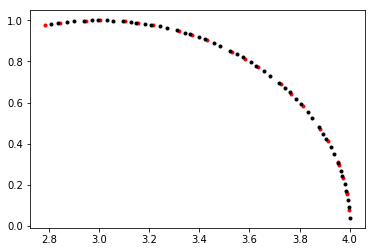

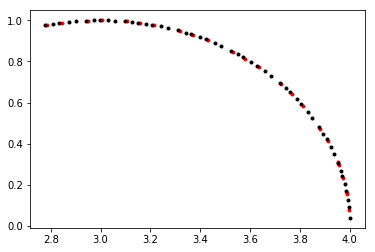

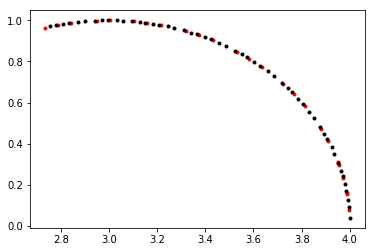

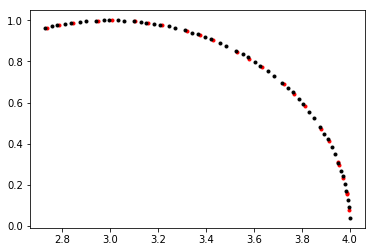

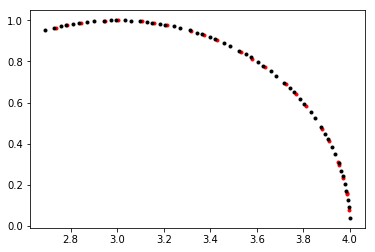

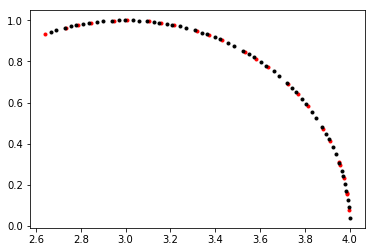

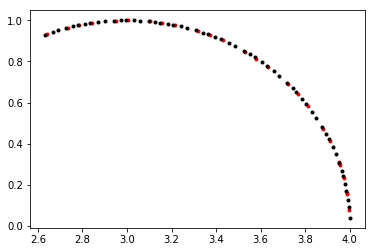

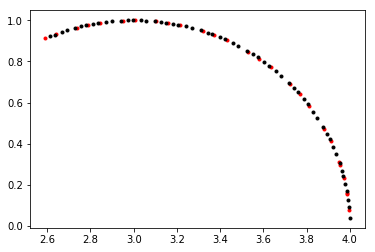

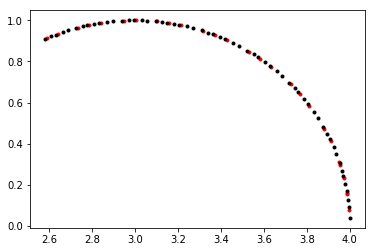

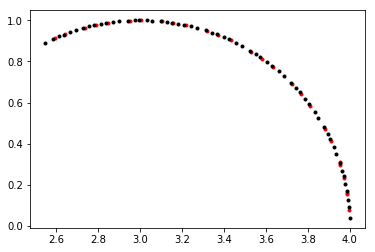

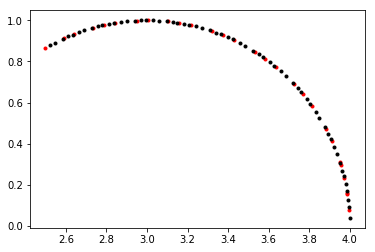

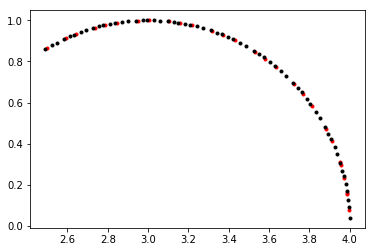

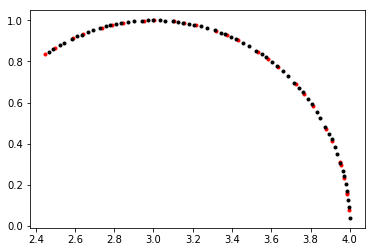

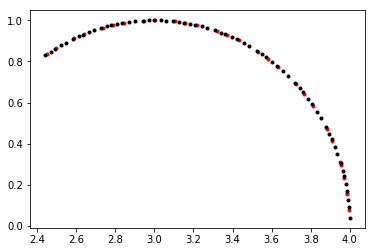

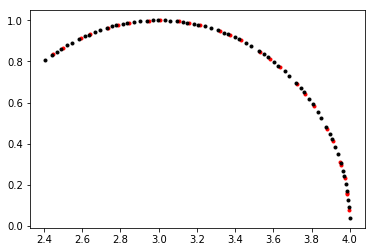

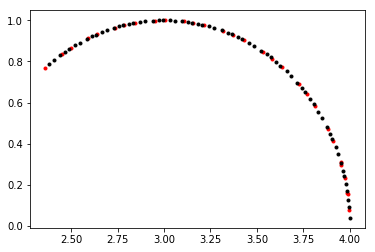

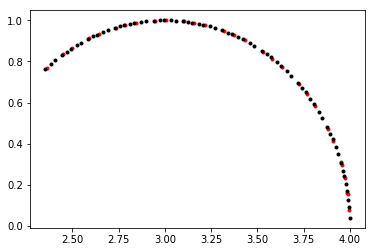

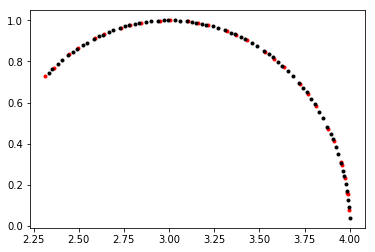

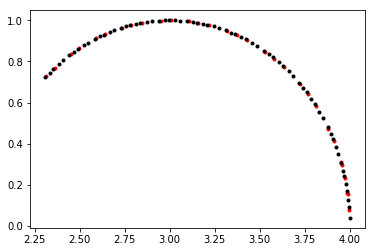

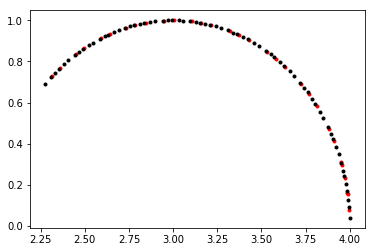

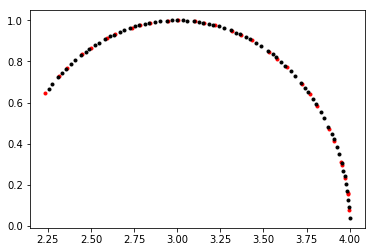

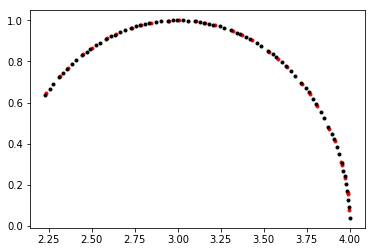

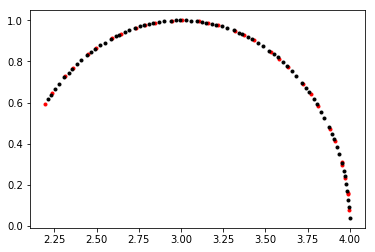

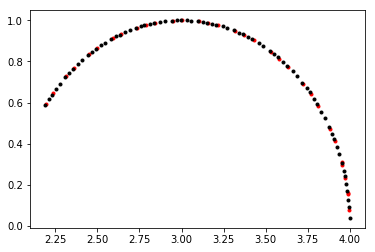

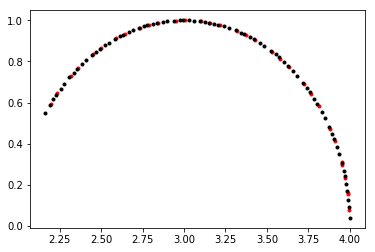

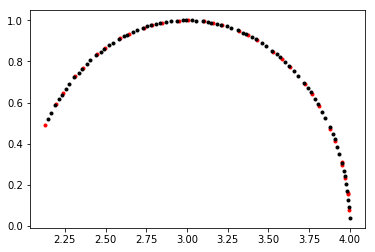

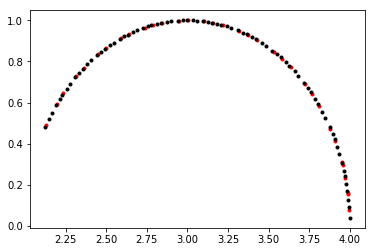

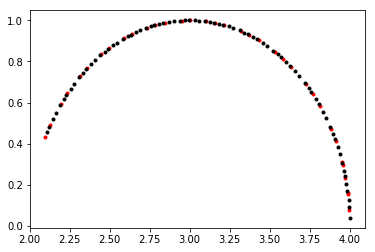

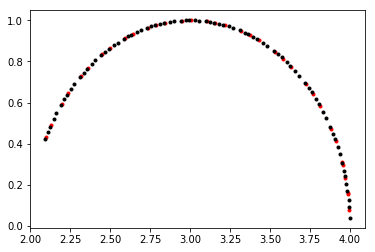

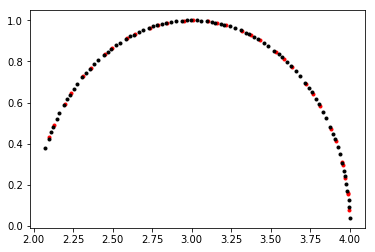

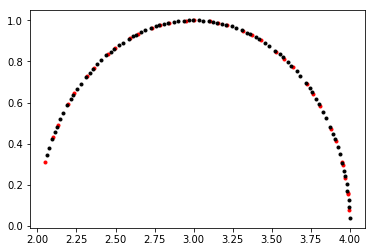

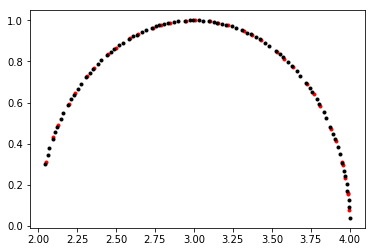

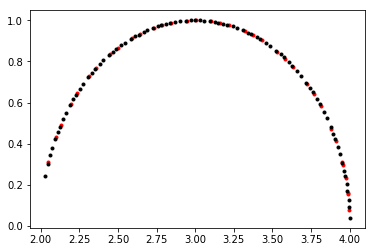

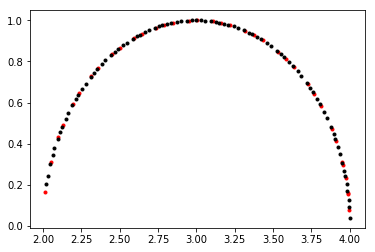

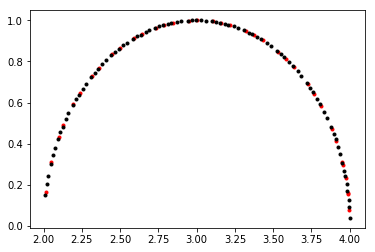

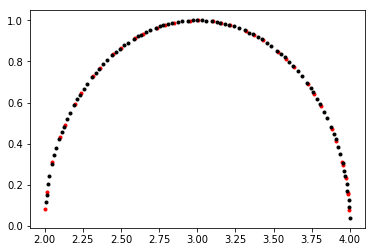

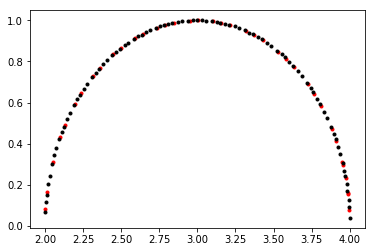

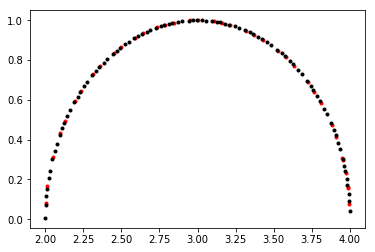

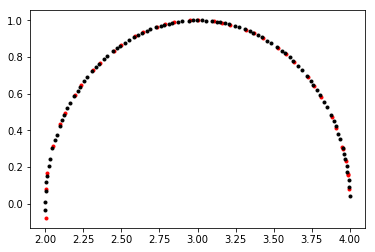

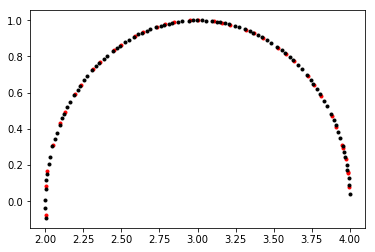

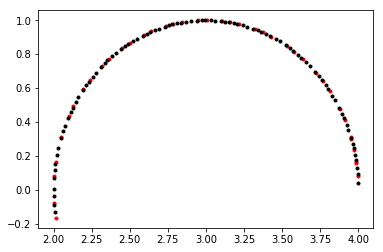

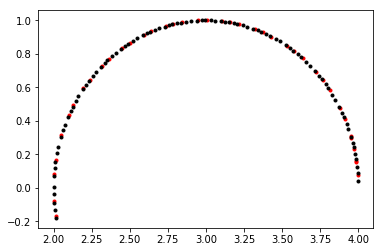

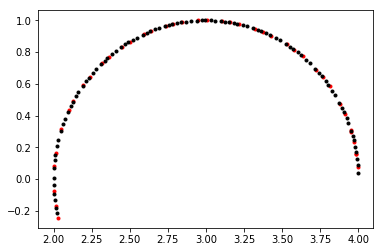

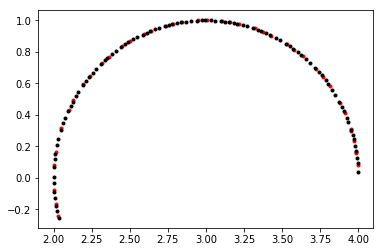

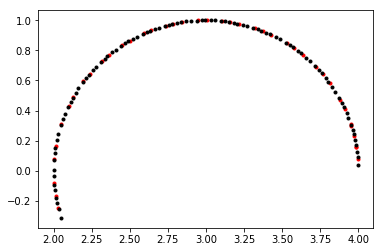

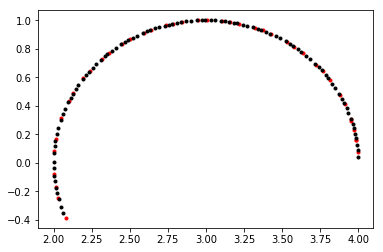

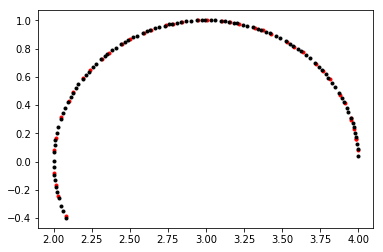

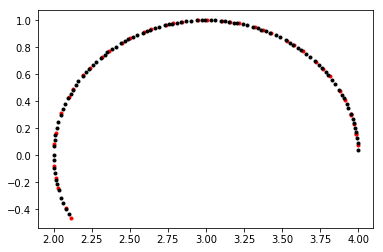

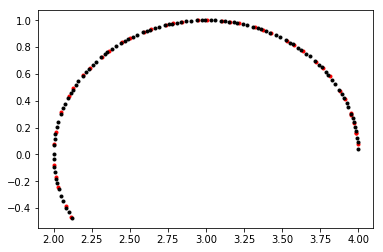

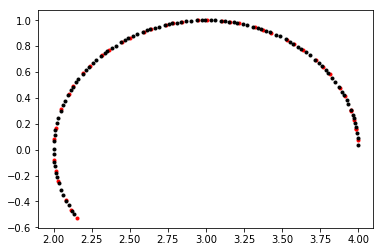

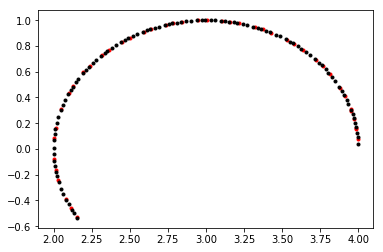

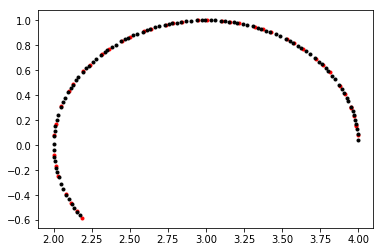

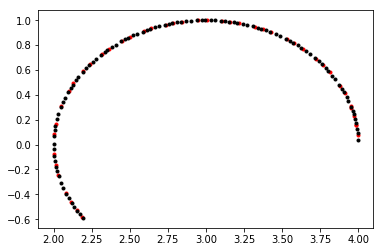

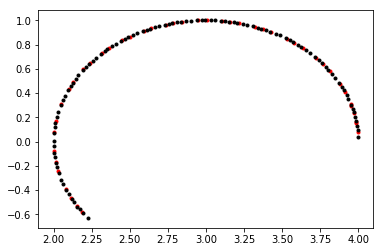

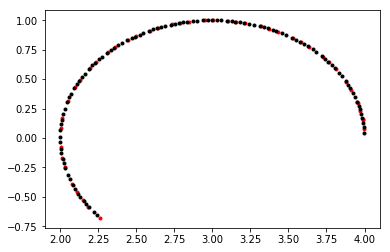

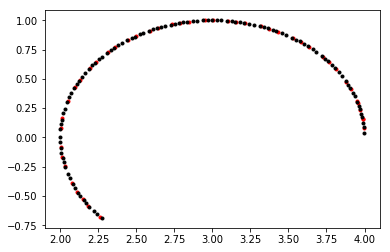

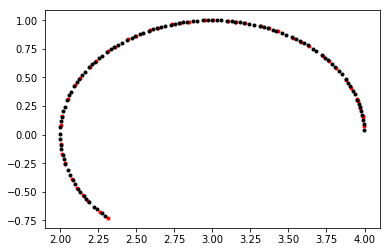

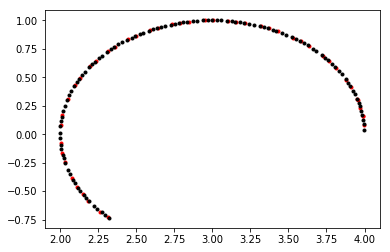

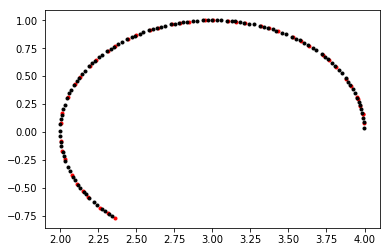

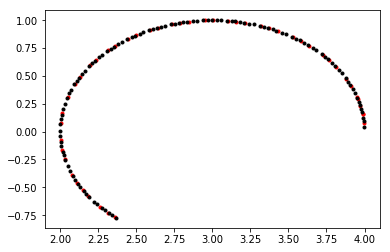

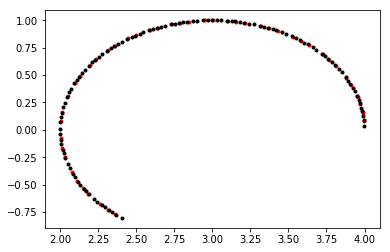

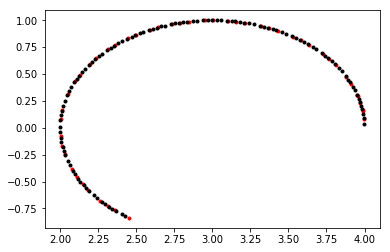

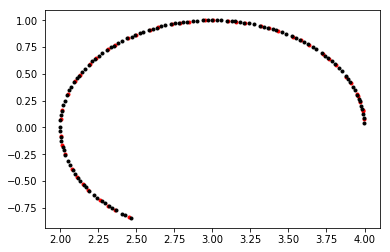

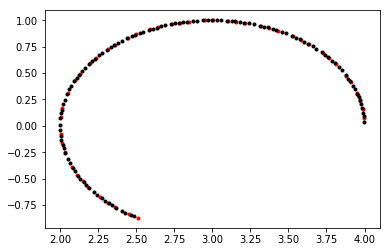

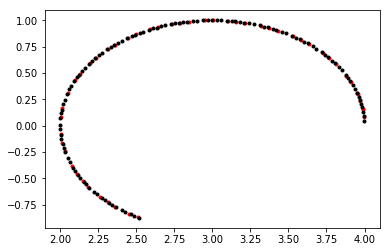

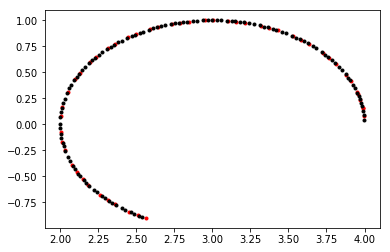

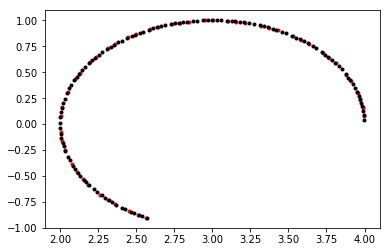

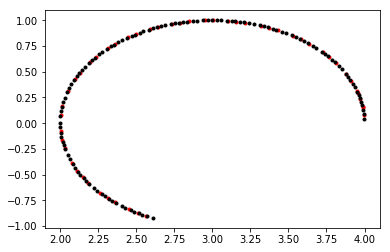

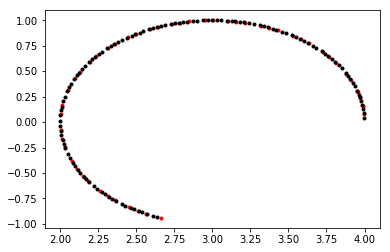

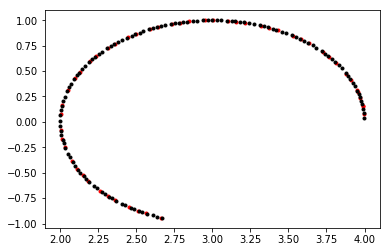

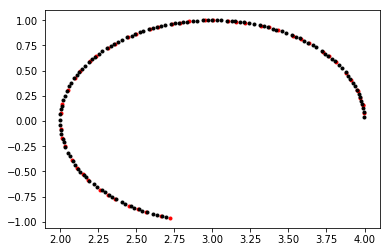

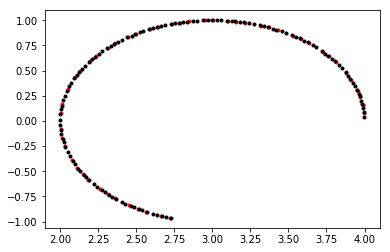

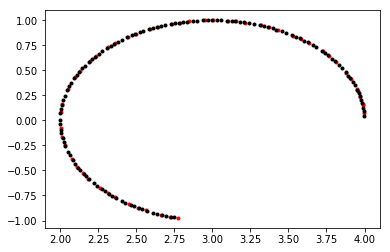

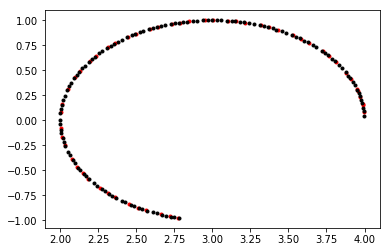

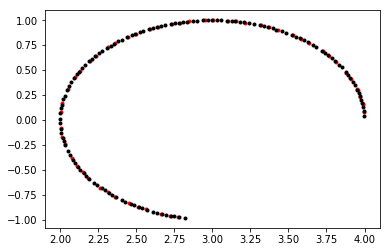

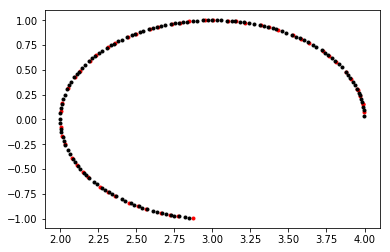

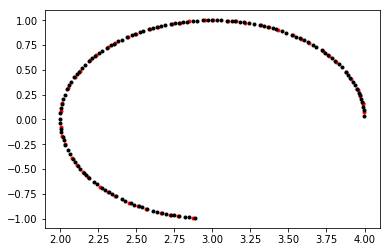

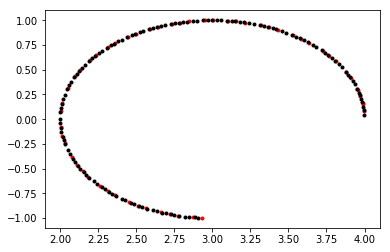

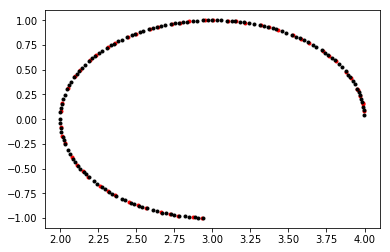

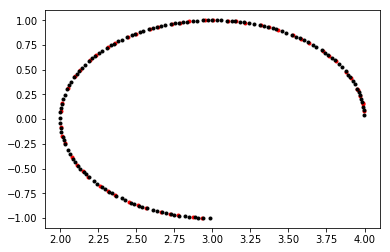

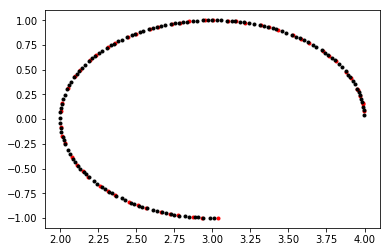

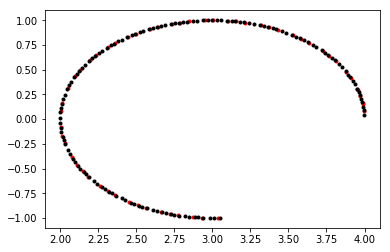

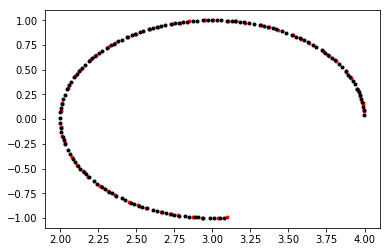

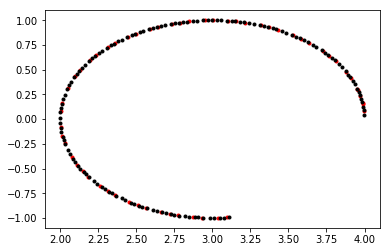

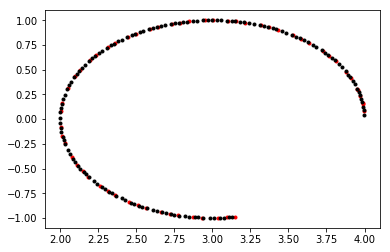

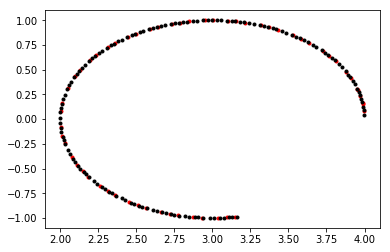

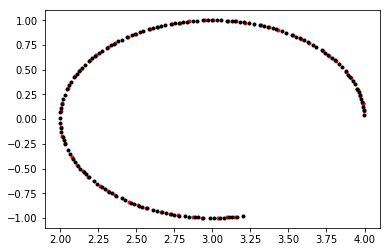

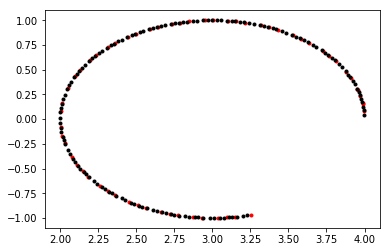

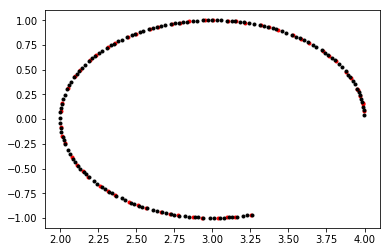

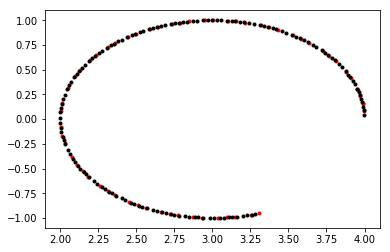

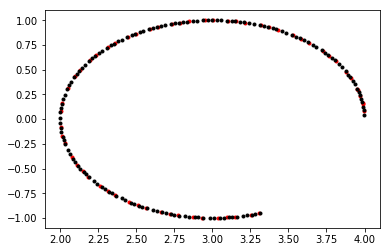

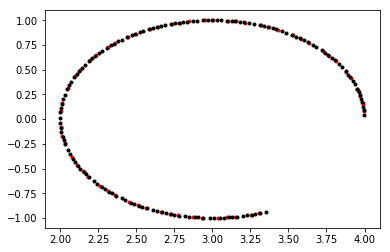

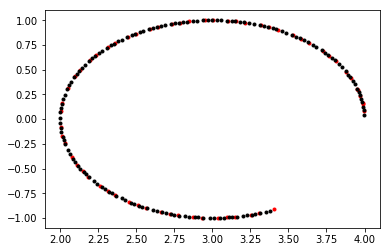

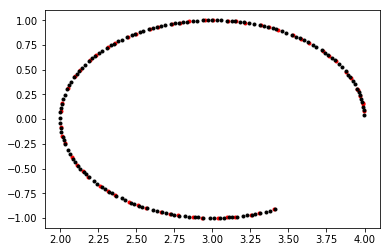

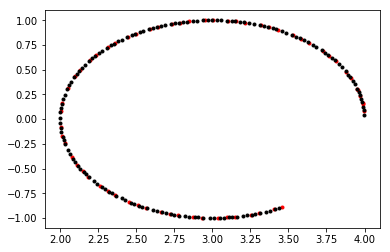

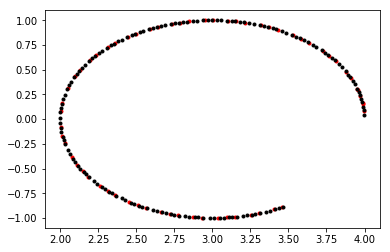

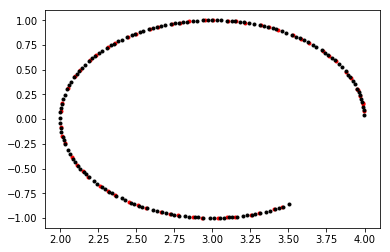

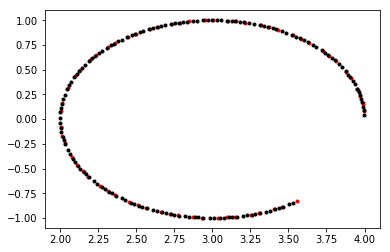

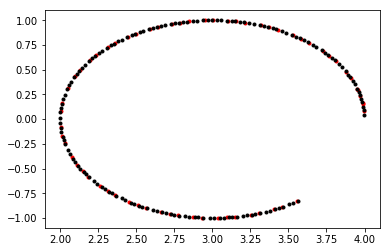

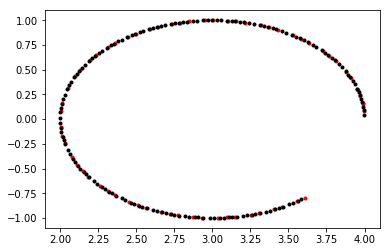

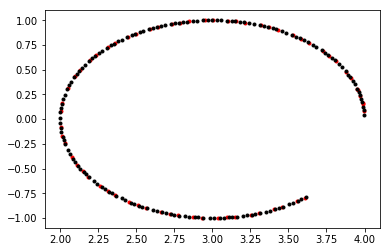

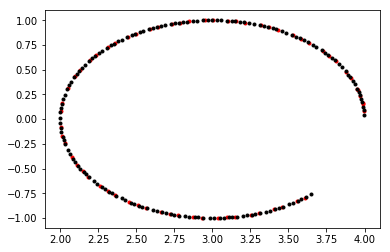

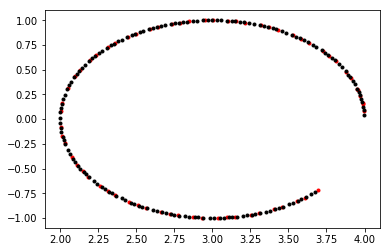

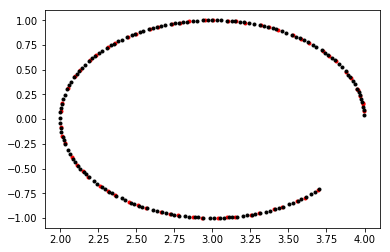

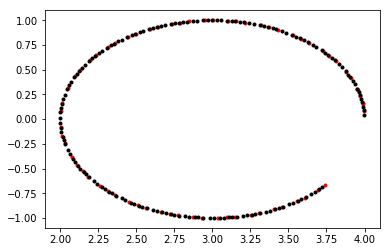

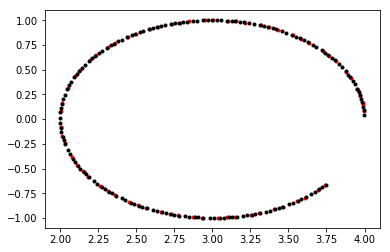

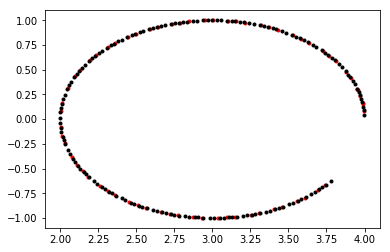

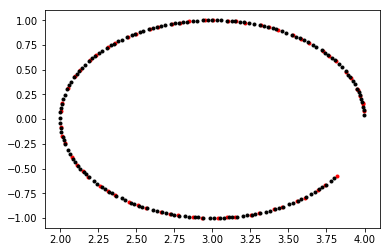

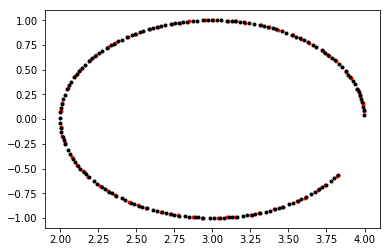

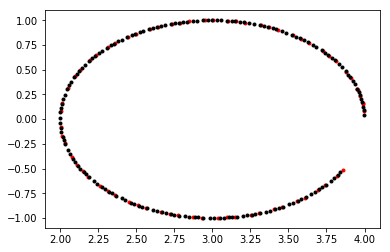

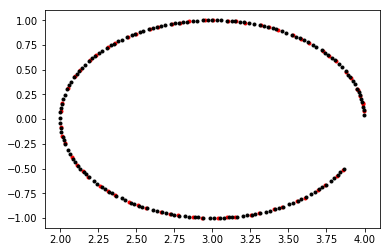

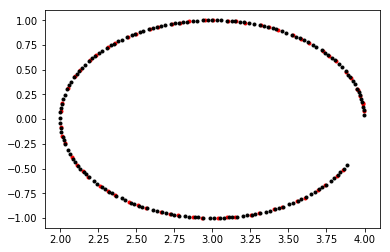

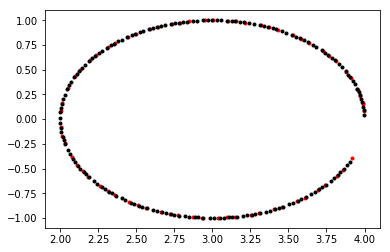

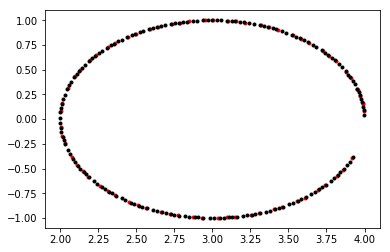

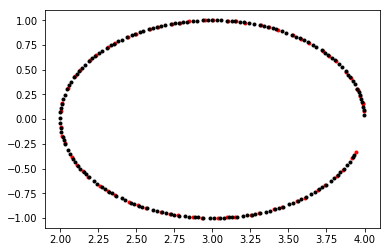

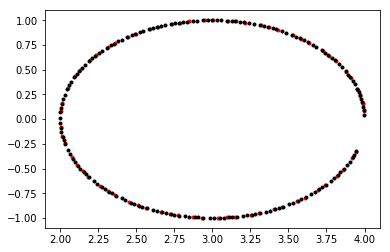

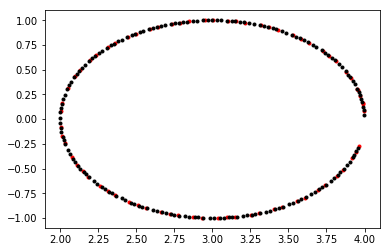

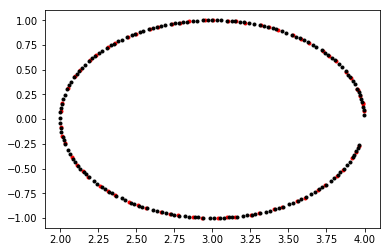

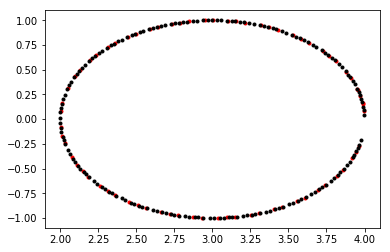

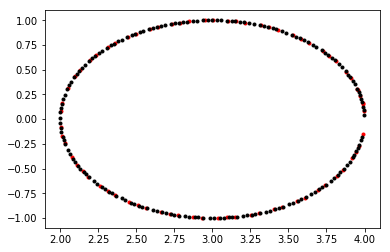

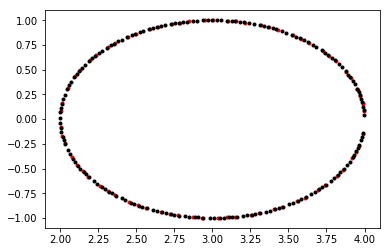

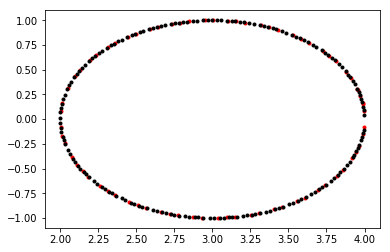

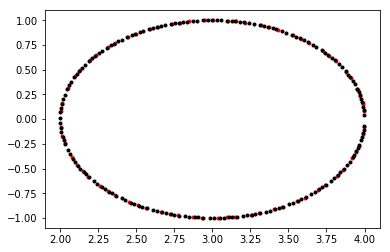

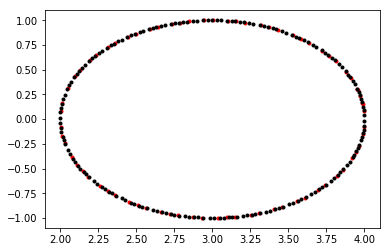

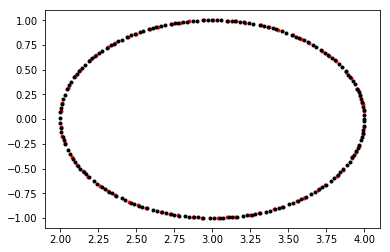

In [10]:
%config InlineBackend.close_figures=False # keep figures open in pyplot

# Calculate the evans function
tstart = time.time()
D_cheb,domain = co_contour_adaptive(c,s,p,m,e,fun)
tstop = time.time()

Run Time = 71.812205 seconds





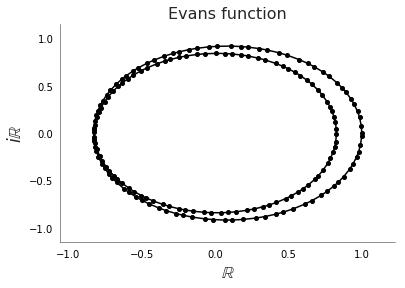

In [16]:
%config InlineBackend.close_figures=True # close figures in pyplot
plt.close("all")

print("Run Time = %f seconds\n\n\n" % (tstop-tstart))
D_cheb = D_cheb/D_cheb[0]

stablab.Evans_plot(D_cheb)